In [1]:
# Loading necessary modules
import pandas as pd              # for data processing; (pd.read_csv)
import numpy as np               # for linear algebra and scientific app
%matplotlib inline

In [2]:
# Loading the dataset
tweet_df = pd.read_csv('C:/Users/sande/Major Project/Dataset/climate_change_tweet.csv',encoding="ISO-8859-1")
df_without_preprocess = pd.read_csv('C:/Users/sande/Major Project/Dataset/climate_change_tweet.csv',encoding = "ISO-8859-1")

In [3]:
# Dimensions of dataset
tweet_df.shape

(6097, 3)

In [4]:
# Dataset picture
tweet_df.head()

,tweet,existence,existence_confidence
0,Global warming report urges governments to act...,Yes,1.0000
1,Fighting poverty and global warming in Africa ...,Yes,1.0000
2,Carbon offsets How a Vatican forest failed to ...,Yes,0.8786
3,Carbon offsets How a Vatican forest failed to ...,Yes,1.0000
4,URUGUAY Tools Needed for Those Most Vulnerable...,Yes,0.8087


In [5]:
tweet_df.tail()

,tweet,existence,existence_confidence
6092,Climate change is real.,Yes,1.0
6093,global warming is a good thing,No,1.0
6094,Climate change is real. Science is real. Pleas...,Yes,1.0
6095,RT @nyc_erik: Climate change is REAL.,Yes,1.0
6096,99.9% of scientists agree climate change is ha...,NaN,1.0


In [6]:
# Data types
tweet_df.dtypes

tweet                    object
existence                object
existence_confidence    float64
dtype: object

In [7]:
tweet_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6097 entries, 0 to 6096
Data columns (total 3 columns):
tweet                   6097 non-null object
existence               4231 non-null object
existence_confidence    6094 non-null float64
dtypes: float64(1), object(2)
memory usage: 143.0+ KB


## Preprocess Tweets

### Before we start building the analyzer, we first need to remove noise and preprocess tweets by using the following steps:

* Lower Case - Convert the tweets to lower case.
* URLs - Eliminate all of these URLs via regular expression matching or replace with generic word URL.
* @username - Remove "@username" via regex matching or replace it with generic word AT_USER.
* #hashtag - replace hashtags with the exact same word without the hash (hash tags may provide some useful information), e.g. #boycottUnitedAirlines replaced with ' boycottUnitedAirlines '.
* Punctuations and additional white spaces - remove punctuation at the start and ending of the tweets, e.g: ' the day is beautiful! ' replaced with 'the day is beautiful'. We also replace multiple whitespaces with a single whitespace.

In [8]:
###Preprocess tweets
def preprocess_tweet(current_tweet):
    # process the tweets

    #Convert the whole tweet into lower case
    current_tweet = current_tweet.lower()
    current_tweet.lower()
    #convert the url so as to remove it in stopword
    current_tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',current_tweet)
    #Remove username
    current_tweet = re.sub('@[^\s]+','AT_USER',current_tweet)
    #Remove additional white spaces
    current_tweet = re.sub('[\s]+', ' ', current_tweet)
    current_tweet = re.sub('[\n]+', ' ', current_tweet)
    #Remove the special chars and white spaces
    current_tweet = re.sub(r'[^\w]', ' ', current_tweet)
    current_tweet = re.sub(r'#([^\s]+)', r'\1', current_tweet)
    #Remove :( or :)
    current_tweet = current_tweet.replace(':)','')
    current_tweet = current_tweet.replace(':(','')
    #trim
    current_tweet = current_tweet.strip('\'"')
    re.sub('[^A-Za-z0-9]+', '', current_tweet)
    replaceTwoOrMoreRepetition(current_tweet)
    return current_tweet    

###get stopword list
def getStopWordList(File_name):
    #read the stopwords file and build a list
    stopWords = []
    stopWords.append('at_user')
    stopWords.append('url')

    fp = open(File_name, 'r')
    line = fp.readline()
    while line:
        word = line.strip()
        stopWords.append(word)
        line = fp.readline()
    fp.close()
    return stopWords



def replaceTwoOrMoreRepetition(s):
    #look for 2 or more repetitions of character and replace with the character itself
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", s)
#end

In [9]:
stopWords = []

st = open('stopwords.txt', 'r')
stopWords = getStopWordList('stopwords.txt')
stopWords

['at_user',
 'url',
 'a',
 'at_user',
 'rt',
 'am',
 'about',
 'above',
 'across',
 'after',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'among',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyone',
 'anything',
 'anywhere',
 'are',
 'area',
 'areas',
 'around',
 'as',
 'ask',
 'asked',
 'asking',
 'asks',
 'at',
 'away',
 'b',
 'back',
 'backed',
 'backing',
 'backs',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'been',
 'before',
 'began',
 'behind',
 'being',
 'beings',
 'best',
 'better',
 'between',
 'big',
 'both',
 'but',
 'by',
 'c',
 'came',
 'can',
 'cannot',
 'case',
 'cases',
 'certain',
 'certainly',
 'clear',
 'clearly',
 'come',
 'could',
 'd',
 'did',
 'differ',
 'different',
 'differently',
 'do',
 'does',
 'done',
 'down',
 'downed',
 'downing',
 'downs',
 'during',
 'e',
 'each',
 'early',
 'either',
 'enough',
 'even',
 'evenly',
 'ever',
 'every',
 'everybody',
 'everyone',
 'everything',


In [10]:
import re
import csv

In [11]:
for i in range(0,6097):
    tweet=tweet_df.iloc[i,0]
    tweet_df.iloc[i,0]=preprocess_tweet(tweet)

In [12]:
tweet_df.head()

,tweet,existence,existence_confidence
0,global warming report urges governments to act...,Yes,1.0000
1,fighting poverty and global warming in africa ...,Yes,1.0000
2,carbon offsets how a vatican forest failed to ...,Yes,0.8786
3,carbon offsets how a vatican forest failed to ...,Yes,1.0000
4,uruguay tools needed for those most vulnerable...,Yes,0.8087


In [13]:
def getFeatureVector(tweet):
    features = []
    tweet=preprocess_tweet(tweet)
    words = tweet.split()
    for w in words:
        w = replaceTwoOrMoreRepetition(w)
        #strip digits
        w = w.strip('0123456789')
        #strip punctuation
        w = w.strip('\'"!?,.')
        if (w == ""):
            continue
        elif (w in stopWords):
            continue
        else:
            features.append(w.lower())

    return features
#end

In [14]:
for i in range(0,6097):
    tweet=tweet_df.iloc[i,0]
    a=getFeatureVector(tweet)
    tweet_df.iloc[i,0] = " ".join(a)
    print(a)
    

['global', 'warming', 'report', 'urges', 'governments', 'act', 'brussels', 'belgium', 'ap', 'world', 'increased', 'hunger', 'link']
['fighting', 'poverty', 'global', 'warming', 'africa', 'link']
['carbon', 'offsets', 'vatican', 'forest', 'failed', 'reduce', 'global', 'warming', 'link']
['carbon', 'offsets', 'vatican', 'forest', 'failed', 'reduce', 'global', 'warming', 'link']
['uruguay', 'tools', 'vulnerable', 'climate', 'change', 'link']
['ocean', 'saltiness', 'global', 'warming', 'intensifying', 'water', 'cycle', 'link']
['global', 'warming', 'evidence', 'message', 'global', 'warming', 'deniers', 'doubters', 'look', 'link']
['migratory', 'birds', 'climate', 'change', 'strategy', 'stay', 'home', 'link']
['southern', 'africa', 'competing', 'limpopo', 'water', 'climate', 'change', 'bring', 'temperatures', 'southe', 'link']
['global', 'warming', 'impact', 'wheat', 'rice', 'production', 'india', 'ludhian', 'apr', 'scarcity', 'water', 'serious', 'link']
['solve', 'global', 'warming', 'link

['earth', 'day', 'resources', 'coping', 'climate', 'change', 'link']
['ocean', 'saltiness', 'global', 'warming', 'intensifying', 'water', 'cycle', 'link']
['ocean', 'saltiness', 'global', 'warming', 'intensifying', 'water', 'cycle', 'link']
['fedele', 'bauccio', 'combating', 'climate', 'change', 'meal', 'time', 'week', 'americans', 'celebrate', 'th', 'anniver', 'link']
['support', 'world', 'people', 'conf', 'climate', 'change', 'cochabamba', 'bolivia', 'watch', 'live', 'link']
['barrett', 'lots', 'protocols', 'climate', 'change', 'pushing', 'comprehensive']
['topography', 'mountains', 'complicate', 'rates', 'global', 'warming', 'link']
['support', 'world', 'people', 'conference', 'climate', 'change', 'cochabamba', 'bolivia', 'watch', 'live', 'link']
['global', 'issues', 'require', 'universal', 'co', 'operation', 'address', 'smallpox', 'ozone', 'layer', 'climate', 'change']
['bolivia', 'president', 'global', 'warming', 'link']
['boiling', 'containing', 'spill', 'climate', 'change', 'ind

['epa', 'climate', 'change', 'indicators', 'report', 'evidence', 'global', 'warming', 'link']
['epa', 'climate', 'change', 'indicators', 'report', 'evidence', 'global', 'warming', 'atural', 'resources', 'defense', 'counc', 'link']
['exclusive', 'climate', 'change', 'raise', 'cost', 'allergies', 'link']
['syed', 'husin', 'effects', 'global', 'warming', 'malaysia', 'link']
['cleaner', 'air', 'speed', 'global', 'warming', 'link']
['whale', 'poo', 'fights', 'global', 'warming', 'rob', 'mayeda', 'lori', 'preuitt', 'star', 'trek', 'iv', 'voyage', 'home', 'convinced', 'link']
['exclusive', 'climate', 'change', 'raise', 'cost', 'allergies', 'link']
['support', 'global', 'warming', 'recent', 'letter', 'writer', 'charles', 'kesner', 'touch', 'reliable', 'ne', 'link']
['qut', 'researchers', 'track', 'climate', 'change', 'link']
['study', 'climate', 'change', 'threatens', 'health', 'link']
['slideshow', 'alaska', 'effects', 'global', 'warming', 'link']
['vino', 'veritas', 'delicate', 'wine', 'grap

['trigger', 'online', 'roulette', 'scam', 'screaming', '_o_', 'climate', 'change', 'clinical', 'trials', 'collagen', 'clinique', 'cl', 'link']
['climate', 'scientist', 'sues', 'newspaper', '_poisoning_', 'global', 'warming', 'debate', 'link']
['climate', 'scientist', 'sues', 'newspaper', '_poisoning_', 'global', 'warming', 'debate', 'link']
['climate', 'scientist', 'sues', 'newspaper', '_poisoning_', 'global', 'warming', 'debate', 'link']
['politico', 'graham', 'own', 'private', 'climate', 'change', 'glenn', 'thrush', 'graham', 'own', 'private', 'climatechange', 'link']
['democratic', 'leader', 'moves', 'immigration', 'bill', 'ahead', 'climate', 'change', 'sen', 'ate', 'priority', 'washington', 'ap', '_', 'sen', 'ate', 'ma', 'link']
['keeping', 'migraine', 'bay', 'screaming', '_o_', 'climate', 'change', 'clinical', 'trials', 'collagen', 'clinique', 'clip', 'art', 'clo', 'link']
['climate', 'scientist', 'sues', 'newspaper', 'poisoning', 'global', 'warming', 'debate', 'link']
['climate',

['sec', 'warns', 'publically', 'held', 'companies', 'advise', 'investors', 'risks', 'climate', 'change', 'csr']
['save', 'whales', 'save', 'global', 'warming', 'tcot']
['al', 'gore', 'ira', 'sn', 'ake', 'coming', 'aisle', 'wouldn', 'debate', 'dawdle', 'climate', 'change']
['leaders', 'climate', 'change', 'burner']
['grapes', 'wrath', 'trouble', 'climate', 'change', 'mean', 'agriculture']
['allergies', 'jon', 'ah', 'goldberg', 'blame', 'global', 'warming', 'time', 'magazine', 'allergies', 'worse', 'blame']
['climate', 'change', 'allergies', 'getting', 'worse', 'via']
['watch', 'pbs', 'dimming', 'sun', 'npr', 'cleaner', 'air', 'actually', 'intensify', 'global', 'warming']
['people', 'poor', 'countries', 'times', 'affected', 'disasters', 'caused', 'climate', 'change', 'developed', 'world']
['allergies', 'jon', 'ah', 'goldberg', 'blame', 'global', 'warming', 'time', 'magazine', 'allergies', 'worse', 'blame']
['italy', 'phd', 'programme', 'science', 'agement', 'climate', 'change', 'phd', 'p

['contra', 'costa', 'times', 'editorial', 'assess', 'global', 'warming', 'uncensored', 'science', 'debate', 'global', 'warming', 'ha']
['global', 'warming', 'balancing', 'quotes', 'saying', 'oxburgh', 'inquiry', 'didn']
['ben', 'bova', 'news', 'global', 'warming', 'stock', 'market', 'earth', 'day', 'ben', 'bova', 'swallow', 'summer', 'ma']
['podcast', 'recycling', 'water', 'meat', 'global', 'warming', 'peanuts', 'rare', 'grapes', 'kcrw', 'good', 'food']
['climate', 'change', 'initiatives']
['greenhoof', '_', 'blog', 'archive', '_', 'tobacco', 'climate', 'change']
['pavley', 'predicts', 'ballot', 'measure', 'aim', 'overturn', 'global', 'warming', 'law']
['county', 'disputes', 'global', 'warming', 'laura', 'london', 'staff', 'writer', 'otero', 'county', 'commission', 'involved', 'discussi']
['global', 'warming', 'answers', 'question', 'answers', 'question']
['looks', 'climate', 'change', 'bill', 'introduced', 'sen', 'ate', 'week', 'monday']
['strategy', 'sen', 'ate', 'climate', 'bill', '

['billions', 'wasted', 'chasing', 'phantom', 'ace', 'heliogenic', 'climate', 'change', 'via']
['feds', 'won', 'protect', 'pika', 'climate', 'change', 'unearthed', 'earthjustice', 'blog', 'via']
['climate', 'change', 'scepticism', 'rise', 'skip', 'end', 'via']
['actress', 'orianka', 'kilcher', 'climate', 'change', 'act']
['perkins', 'coie', 'news', 'publications', 'updates', 'detaildoes', 'climate', 'change', 'affect', 'busin', 'via']
['intern', 'ation', 'al', 'law', 'firm', 'fulbright', 'jaworski', 'climate', 'change', 'post', 'copenhagen', 'via']
['climate', 'change', 'focus', 'homeland', 'security', 'foundry', 'conservative', 'policy', 'news', 'via']
['videos', 'humans', 'changing', 'climate', 'climate', 'change', 'danger', 'via']
['climate', 'change', 'dramatic', 'impact', 'hydropower', 'technology', 'solutions', 'home', 'smart', 'via']
['implications', 'incorporating', 'air', 'quality', 'co', 'benefits', 'climate', 'change', 'policymaking', 'via']
['climate', 'change', 'hiding', 'd

['clarify', 'environmentalist', 'climate', 'change', 'denier', 'witnessing', 'argument']
['decent', 'human', 'youre', 'trying', 'climate', 'change', 'political', 'hard', 'respect', 'opinions']
['please', 'explain', 'conservatives', 'climate', 'change', 'colder', 'weather', 'patterns', 'shift']
['please', 'explain', 'conservatives', 'climate', 'change', 'colder', 'weather', 'patterns', 'shift']
['please', 'explain', 'conservatives', 'climate', 'change', 'colder', 'weather', 'patterns', 'shift']
['dc', 'snowstorm', 'global', 'warming']
['woot', 'hey', 'wow', 'federal', 'climate', 'change', 'agency', 'announced', 'cool']
['federal', 'climate', 'change', 'agency', 'forming']
['tea', 'party', 'gang', 'focused', 'scuttling', 'california', 'global', 'warming', 'law']
['federal', 'climate', 'change', 'agency', 'forming']
['federal', 'climate', 'change', 'agency', 'forming']
['oh', 'good', 'god', 'don', 'tell', 'climate', 'change', 'denier']
['federal', 'climate', 'change', 'agency', 'forming']

['snow', 'snow', 'global', 'warming', 'people', 'trying', 'stay']
['olympic', 'organizers', 'desperate', 'climate', 'change']
['california', 'network', 'monitor', 'global', 'warming', 'emissions']
['science', 'scandals', 'coming', 'air', 'gone', 'climate', 'change', 'movement']
['poll', 'nevada', 'skeptical', 'global', 'warming', 'nevadans', 'cool', 'idea', 'planet', 'getting', 'warmer']
['researched', 'article', 'global', 'warming', 'climate', 'change', 'hoax']
['india', 'country', 'probe', 'climate', 'change', 'hoax', 'wake', 'america', 'al', 'gore', 'greenies', 'fraud']
['robin', 'mckie', 'benny', 'peiser', 'science', 'climate', 'change', 'undermined', 'email', 'leaks', 'ipcc', 'glacie']
['doesn', 'believe', 'evolution', 'denies', 'climate', 'change', 'africa', 'country', 'palin', 'president']
['global', 'warming', 'plot', 'mm', 'ah', 'kan', 'ab', 'republican', 'fat', 'conspiracy', 'scientists']
['global', 'warming', 'collapse', 'globe', 'mail']
['dumbass', 'global', 'warming', 'bel

['global', 'warming', 'hoax', 'houston', 'expert', 'talks', 'climate', 'alarmist', 'pollution', 'culturemap', 'houston']
['publicly', 'bought', 'global', 'warming', 'lie', 'stay', 'loyal', 'lindsay', 'graham', 'paid', 'al', 'gore', 'stupid']
['climate', 'change', 'debate', 'climatologists', 'meteorologists', 'divided', 'global', 'warmi', 'via']
['acidic', 'oceans', 'worsening', 'experts', 'warn', 'climate', 'change', 'msnbc', 'com', 'via']
['tories', 'branding', 'substance', 'climate', 'change', 'labou', 'via']
['earth', 'day', 'al', 'gore', 'shadow', 'six', 'weeks', 'climate', 'change']
['npra', 'carbon', 'fee', 'fuels', 'doesn', 'help', 'flawed', 'climate', 'change', 'plan']
['sea', 'change', 'climate', 'change', 'regulation', 'good', 'true']
['treating', 'climate', 'change', 'curable', 'disease', 'news', 'aggregated', 'newzfor', 'fee', 'via']
['honor', 'earthday', 'brochure', 'global', 'warming']
['global', 'warming', 'chapter', 'envnewsnet']
['special', 'report', 'networks', 'hide'

In [15]:
tweet_df.columns = ['tweet', 'existence', 'existence_conf']
tweet_df.existence.replace(['Yes', 'No', 'Y', 'N'], ['yes', 'no', 'yes', 'no'], inplace=True)
df_without_preprocess.existence.replace(['Yes', 'No', 'Y', 'N'], ['yes', 'no', 'yes', 'no'], inplace=True)
tweet_df.tweet = tweet_df.tweet.str.replace('https?://[^ ,]+', '[link]') #replace links with '[link]'
tweet_df.existence.fillna('neutral', inplace=True)
df_without_preprocess.existence.fillna('neutral', inplace=True)
#tweet_df = tweet_df.sort_values('existence_conf', ascending=False).drop_duplicates(subset=['tweet'])
tweet_df = tweet_df[tweet_df.tweet != '[link]']   # One tweet consists only of a link

In [66]:
# Remove 'neutral' tweets. Will build model using only 'accept' and 'deny' classes
tweet_df = tweet_df[(tweet_df.existence != 'neutral')]
df_without_preprocess = df_without_preprocess[(df_without_preprocess.existence != 'neutral')]
tweet_df = tweet_df.reset_index(drop=True)
df_without_preprocess = df_without_preprocess.reset_index(drop=True)

In [67]:
# Check class balance
tweet_df.existence.value_counts(normalize=True)

yes    0.736469
no     0.263531
Name: existence, dtype: float64

In [68]:
def getFeatureVector(tweet):
    features = []

    words = tweet.split()
    for w in words:

        w = replaceTwoOrMore(w)

        #strip digits
        w = w.strip('0123456789')

        #strip punctuation
        w = w.strip('\'"!?,.')

        if (w == ""):
            continue
        elif(w in stopWords):
            #print w
            continue
        else:
            features.append(w.lower())

    return features
#end

In [69]:
###get stopword list
def getStopWordList(stopWordListFileName):
    #read the stopwords file and build a list
    stopWords = []
    stopWords.append('at_user')
    stopWords.append('url')

    fp = open(stopWordListFileName, 'r')
    line = fp.readline()
    while line:
        word = line.strip()
        stopWords.append(word)
        line = fp.readline()
    fp.close()
    return stopWords



def replaceTwoOrMore(s):
    #look for 2 or more repetitions of character and replace with the character itself
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", s)
#end

In [70]:
tweet_df.tail()

,tweet,existence,existence_conf,Sentiment_num
4226,earthday reminds ignore threat climate change ...,yes,1.0,1
4227,climate change real,yes,1.0,1
4228,global warming good,no,1.0,0
4229,climate change real science real please reuse ...,yes,1.0,1
4230,climate change real,yes,1.0,1


In [71]:
tweets = []
featureList = []
for i in range(0,4231):
    sentiment = tweet_df['existence'][i]
    tweet = tweet_df['tweet'][i]
    processedTweet = preprocess_tweet(tweet)
    featureVector = getFeatureVector(processedTweet)
    featureList.extend(featureVector)
    tweets.append((featureVector, sentiment))


In [148]:
tweet_df.head()

,tweet,existence,existence_conf,Sentiment_num
0,global warming report urges governments act br...,yes,1.0000,1
1,fighting poverty global warming africa link,yes,1.0000,1
2,carbon offsets vatican forest failed reduce gl...,yes,0.8786,1
3,carbon offsets vatican forest failed reduce gl...,yes,1.0000,1
4,uruguay tools vulnerable climate change link,yes,0.8087,1


In [73]:
def extract_features1(tweet):
    processedTweet = preprocess_tweet(tweet)
    featureVector = getFeatureVector(processedTweet)
    print(featureVector)
    features = {}
    for word in featureList:
        features['contains(%s)' % word] = (word in featureVector)
    return features
    

In [74]:
def extract_features(tweet):
    tweet_words = set(tweet)
    print(tweet_words)
    features = {}
    for word in featureList:
        features['contains(%s)' % word] = (word in tweet_words)
    return features

In [75]:
# examine the shape
tweet_df.shape

(4231, 4)

In [76]:
# examine the class distribution
tweet_df.existence.value_counts()

yes    3116
no     1115
Name: existence, dtype: int64

In [77]:
# convert label to a numerical variable
tweet_df['Sentiment_num'] = tweet_df.existence.map({'yes':1, 'no':0})

In [78]:
# check that the conversion worked
tweet_df.head(10)

,tweet,existence,existence_conf,Sentiment_num
0,global warming report urges governments act br...,yes,1.0000,1
1,fighting poverty global warming africa link,yes,1.0000,1
2,carbon offsets vatican forest failed reduce gl...,yes,0.8786,1
3,carbon offsets vatican forest failed reduce gl...,yes,1.0000,1
4,uruguay tools vulnerable climate change link,yes,0.8087,1
5,ocean saltiness global warming intensifying wa...,yes,1.0000,1
6,global warming evidence message global warming...,yes,1.0000,1
7,migratory birds climate change strategy stay h...,yes,1.0000,1
8,southern africa competing limpopo water climat...,yes,1.0000,1
9,global warming impact wheat rice production in...,yes,1.0000,1


In [79]:
# how to define X and y (from the Suicide data) for use with COUNTVECTORIZER
tweet_df = tweet_df.dropna(how='any')
X = tweet_df.tweet
y = tweet_df.Sentiment_num
print(X.shape)
print(y.shape)

(4231,)
(4231,)


In [80]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3173,)
(1058,)
(3173,)
(1058,)


In [81]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer

In [82]:
# instantiate the vectorizer
vect = CountVectorizer()

In [83]:
# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

In [84]:
# examine the document-term matrix
X_train_dtm

<3173x5531 sparse matrix of type '<class 'numpy.int64'>'
	with 28534 stored elements in Compressed Sparse Row format>

In [85]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1058x5531 sparse matrix of type '<class 'numpy.int64'>'
	with 8653 stored elements in Compressed Sparse Row format>

In [86]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()


In [87]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

Wall time: 4.01 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [88]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [89]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.82703213610586013

In [90]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[171,  82],
       [101, 704]])

In [91]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [92]:

# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

Wall time: 17 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [93]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

In [94]:
# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([ 0.93078282,  0.93064073,  0.78971076, ...,  0.00729859,
        0.9843549 ,  0.87946609])

In [95]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.82325141776937616

In [96]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.88547369454741853

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [98]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_dtm, y_train)
y_pred = knn.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred))

0.787334593573


In [99]:
from sklearn.cross_validation import cross_val_score

In [100]:
vect.fit(X)
X_dtm = vect.transform(X)

In [101]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_dtm, y, cv=10, scoring='accuracy')
print(scores)

[ 0.79009434  0.77358491  0.79481132  0.74528302  0.76179245  0.76122931
  0.73222749  0.75829384  0.76540284  0.73222749]


In [102]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.761494701092


In [103]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_dtm, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.74570567523865283, 0.67210240435869284, 0.76057421778962464, 0.7326395429021042, 0.76149470109244244, 0.75721925947629476, 0.76576235004203652, 0.76527612094429887, 0.76317024067052119, 0.76999644216810847, 0.76316240836680294, 0.76599540335729954, 0.76010419764971693, 0.76552034401253677, 0.76127338566284641, 0.75559010066571408, 0.75795808301142675, 0.76267841216266918, 0.75795920077946743, 0.75653797060677008, 0.758670109180834, 0.75842923148928554, 0.75583545207190339, 0.7551223134194105, 0.75158849372221304, 0.75465061530620292, 0.75206018390798768, 0.75866787364475252, 0.75537157305002589, 0.75913733886435597]


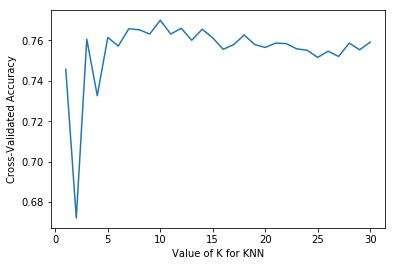

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [105]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X_dtm, y, cv=10, scoring='accuracy').mean())

0.799994535356


In [106]:
# More efficient parameter tuning using GridSearchCV

from sklearn.grid_search import GridSearchCV

In [107]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [108]:

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [109]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [110]:
# fit the grid with data
grid.fit(X_dtm, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [111]:
# view the complete results (list of named tuples)
grid.grid_scores_

[mean: 0.74569, std: 0.07241, params: {'n_neighbors': 1},
 mean: 0.67218, std: 0.11228, params: {'n_neighbors': 2},
 mean: 0.76058, std: 0.01695, params: {'n_neighbors': 3},
 mean: 0.73269, std: 0.04846, params: {'n_neighbors': 4},
 mean: 0.76152, std: 0.02019, params: {'n_neighbors': 5},
 mean: 0.75727, std: 0.03364, params: {'n_neighbors': 6},
 mean: 0.76578, std: 0.01572, params: {'n_neighbors': 7},
 mean: 0.76530, std: 0.02404, params: {'n_neighbors': 8},
 mean: 0.76318, std: 0.01179, params: {'n_neighbors': 9},
 mean: 0.77003, std: 0.01876, params: {'n_neighbors': 10},
 mean: 0.76318, std: 0.01249, params: {'n_neighbors': 11},
 mean: 0.76601, std: 0.02093, params: {'n_neighbors': 12},
 mean: 0.76010, std: 0.01692, params: {'n_neighbors': 13},
 mean: 0.76554, std: 0.02486, params: {'n_neighbors': 14},
 mean: 0.76129, std: 0.01920, params: {'n_neighbors': 15},
 mean: 0.75561, std: 0.03097, params: {'n_neighbors': 16},
 mean: 0.75798, std: 0.01859, params: {'n_neighbors': 17},
 mean:

In [112]:
# examine the first tuple
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)

{'n_neighbors': 1}
[ 0.7759434   0.78773585  0.82075472  0.76179245  0.54009434  0.74940898
  0.73933649  0.77488152  0.77014218  0.73696682]
0.7456865989127865


In [113]:
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

[0.7456865989127865, 0.6721815173717797, 0.7605766958165918, 0.7326873079650201, 0.7615220987946112, 0.757267785393524, 0.7657764121956984, 0.7653037107066887, 0.7631765540061451, 0.7700307255967856, 0.7631765540061451, 0.7660127629402033, 0.7601039943275821, 0.7655400614511936, 0.7612857480501064, 0.7556133301819901, 0.7579768376270385, 0.7627038525171355, 0.7579768376270385, 0.7565587331600094, 0.7586858898605531, 0.7584495391160482, 0.755849680926495, 0.7551406286929804, 0.7515953675254077, 0.7546679272039707, 0.7520680690144174, 0.7586858898605531, 0.7553769794374853, 0.7591585913495628]


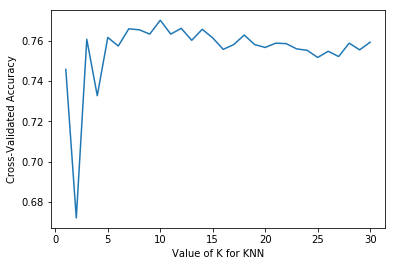

In [114]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [128]:
# convert label to a numerical variable
df_without_preprocess['Sentiment_num'] = df_without_preprocess.existence.map({'yes':1, 'no':0})

In [129]:
# how to define X and y (from the Suicide data) for use with COUNTVECTORIZER
X = df_without_preprocess.tweet
y = df_without_preprocess.Sentiment_num
print(X.shape)
print(y.shape)

(4231,)
(4231,)


In [130]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3173,)
(1058,)
(3173,)
(1058,)


In [131]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
df_without_preprocess.tail()

,tweet,existence,existence_confidence,Sentiment_num
4226,#EarthDay reminds us that we cannot ignore thr...,yes,1.0,1
4227,Climate change is real.,yes,1.0,1
4228,global warming is a good thing,no,1.0,0
4229,Climate change is real. Science is real. Pleas...,yes,1.0,1
4230,RT @nyc_erik: Climate change is REAL.,yes,1.0,1


In [132]:
# instantiate the vectorizer
vect = CountVectorizer()

In [133]:
# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

In [134]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)

In [135]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [136]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

Wall time: 4.13 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [137]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [138]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.83648393194706994

In [139]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[164,  89],
       [ 84, 721]])

In [140]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [141]:
# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

Wall time: 34.1 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [142]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

In [143]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.82136105860113418

In [144]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_dtm, y_train)
y_pred = knn.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred))

0.787334593573


In [145]:
vect.fit(X)
X_dtm = vect.transform(X)

In [146]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_dtm, y, cv=10, scoring='accuracy')
print(scores)

[ 0.78066038  0.78301887  0.79009434  0.72877358  0.73584906  0.71631206
  0.73933649  0.74407583  0.73459716  0.76066351]


In [147]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.751338126893
